In [2]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

fig_DIR = "../figs/pbp_related/"
img_DIR_P = "../data/images/players/"
data_DIR = "../data/pbpdata/"

In [3]:
league = "NBA"
season = "2024"
player_dict = get_players_pbp(league=league)  # Creating Player Dictionary
team_dict = nba_teams.get_teams()  # Creating Team Dictionary
year = season + "-" + str(int(season)+1)[-2:]
with zstd.open(data_DIR + league+"_PBPdata_" + season + ".pkl.zst","rb") as f:
    games_list = dill.load(f)

In [4]:
possessions = [game.possessions.items for game in games_list]
possession_events = list(chain(*[possession.events for possession in list(chain(*possessions))]))

In [52]:
poss = []
for po in possession_events:
    if (
        isinstance(po, FieldGoal)
        and po.is_blocked
    ):
        try:
            poss.append(po.shot_data)
        except:
            pass

In [65]:
df1 = pd.DataFrame(poss)
df1["distance"] = np.sqrt(df1["X"]**2 + df1["Y"]**2)/10

In [79]:
df2 = df1.groupby(["BlockPlayerId"])[["distance"]].agg(["count","mean"])
df2 = df2.reset_index()
df2.columns = ["pID","Blocks","Distance"]
df3 = df2.query("Blocks >=30").sort_values("Distance",ascending=False).reset_index(drop=True)
df3["Player"] = df3["pID"].map(player_dict)
df3

,pID,Blocks,Distance,Player
0,1628384,37,11.218446,OG Anunoby
1,1631212,44,10.081727,Peyton Watson
2,1628401,47,9.365765,Derrick White
3,202699,32,8.165812,Tobias Harris
4,1630183,30,7.862132,Jaden McDaniels
5,203110,38,7.466240,Draymond Green
6,1628436,33,7.144855,Luke Kornet
7,201142,37,7.071958,Kevin Durant
8,203076,75,6.633551,Anthony Davis
9,1631099,31,6.599396,Keegan Murray


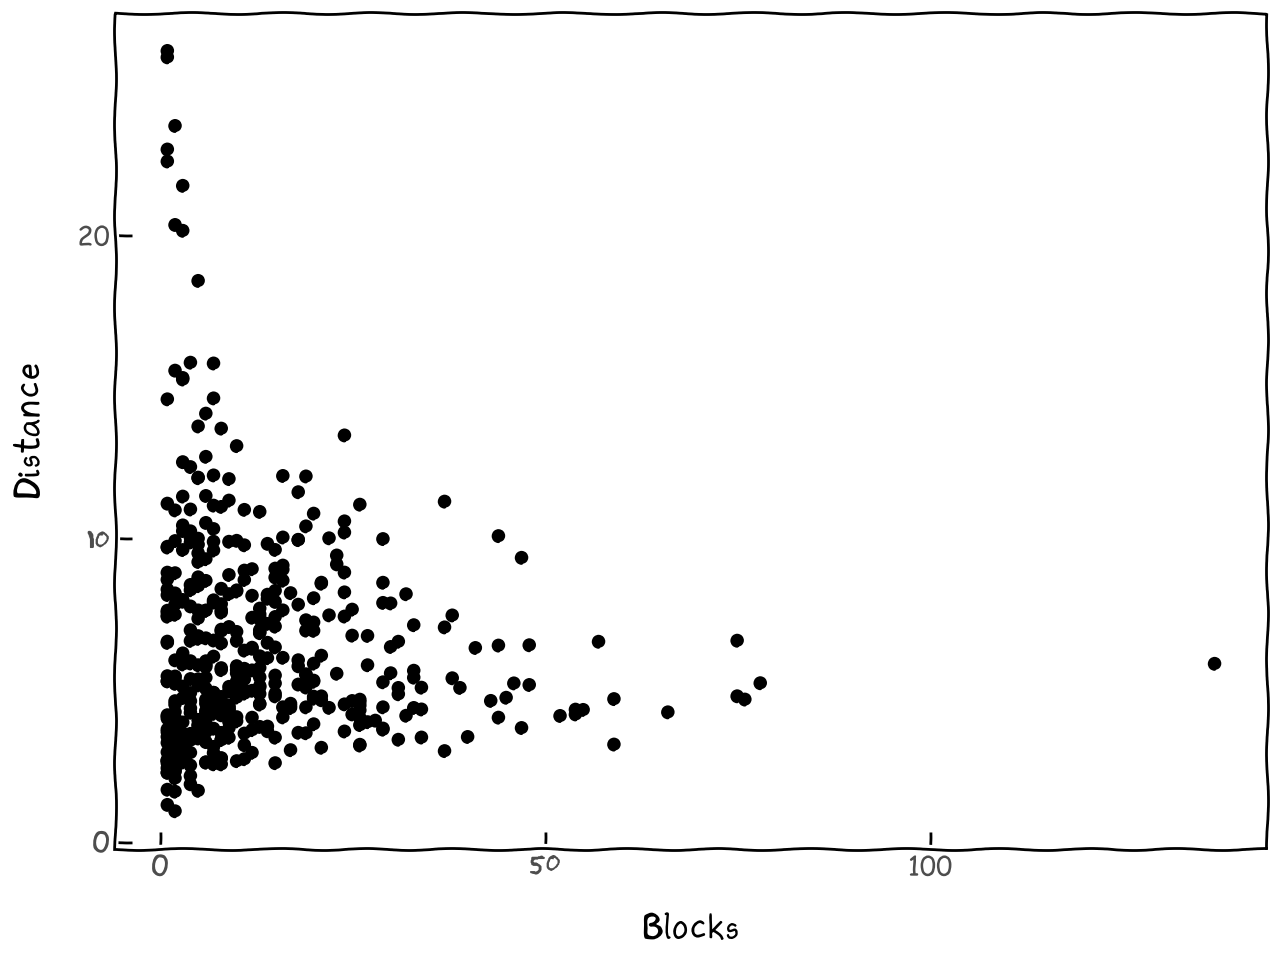

In [81]:
p = (
    ggplot(df2)
    + aes(x="Blocks",y="Distance")
    + geom_point()
    + theme_idv
)
p

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


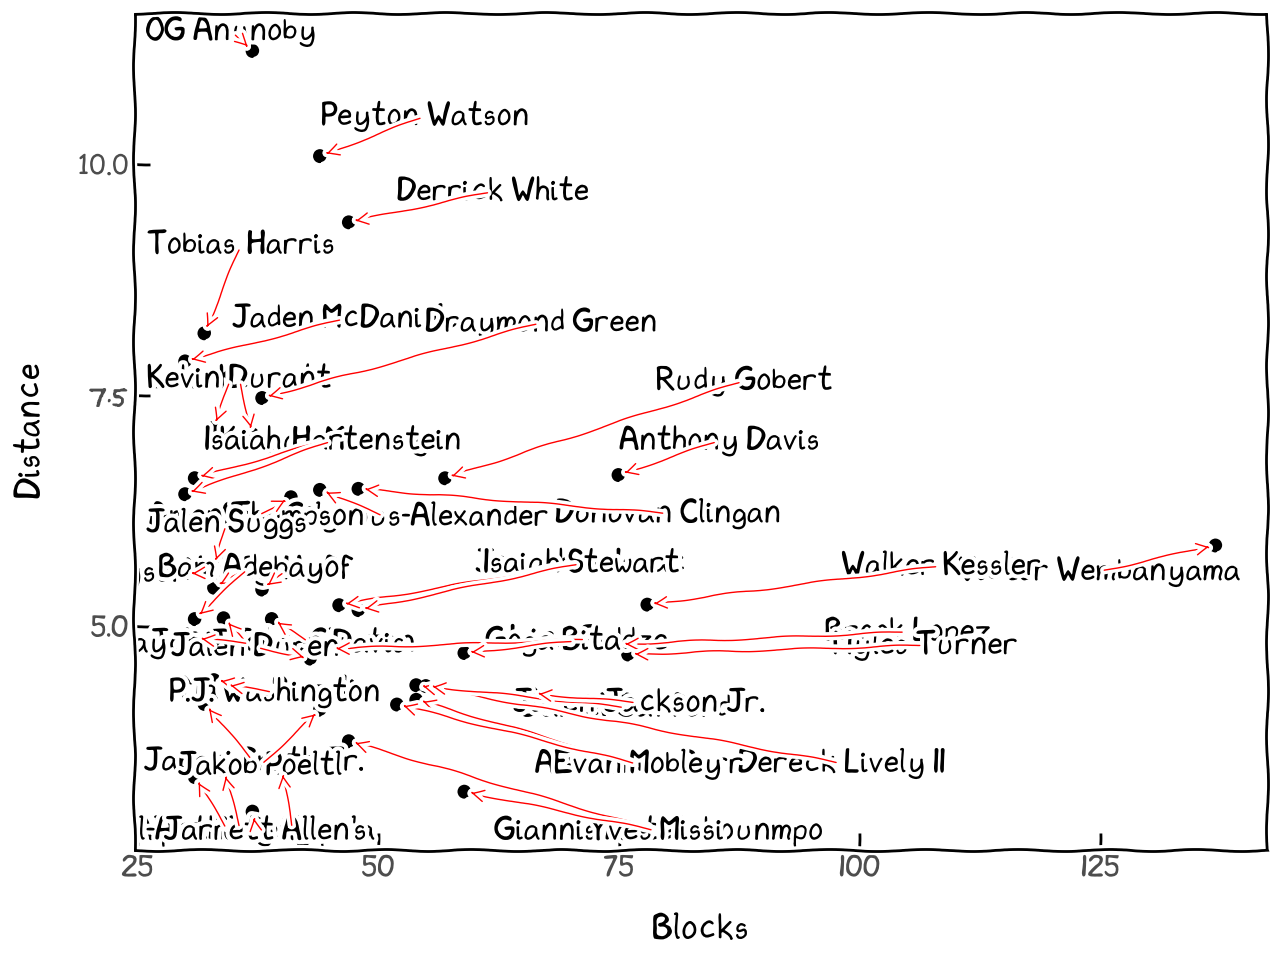

In [87]:
p = (
    ggplot(df3)
    + aes(x="Blocks",y="Distance",label="Player")
    + geom_point()
    + geom_text(adjust_text={ 'expand_points': (2, 2),'arrowprops': {'arrowstyle': '->','color': 'red'}})
    + theme_idv
)
p